In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
GEAR_RATIO = 3591/187
ENCODER_RESOLUTION = 8192
DT = 0.01

In [3]:
# all data was collected at 10ms intervals

In [4]:
with open('500rpm_10ms_1.txt', 'r') as f:
    data_1 = f.read().split('\n')
with open('500rpm_10ms_2.txt', 'r') as f:
    data_2 = f.read().split('\n')
with open('500rpm_10ms_3.txt', 'r') as f:
    data_3 = f.read().split('\n')

In [5]:
print(len(data_1), len(data_2), len(data_3))

2716 1199 1047


In [6]:
def get_rmse(data, target):
    data = np.array(data)
    target = np.array(target)
    return np.sqrt(np.mean((data - target)**2))

def median_filter(data, window_size):
    data = np.array(data)
    result = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - window_size)
        end = min(len(data), i + window_size)
        result[i] = np.median(data[start:end])
    return result

In [24]:
def analyse(data, set_point, xbound=None, ybound=None):
    data_copy = data.copy()
    start_index = 0
    set_speed = []
    read_speed = []
    rm_list = []
    for i, val in enumerate(data_copy):
        try:
            data_copy[i] = int(val.strip())
        except:
            if val != "OK!":
                rm_list.append(i)

    for i, val in enumerate(rm_list):
        _ = data_copy.pop(val - i)

    for i, val in enumerate(data_copy):
        if type(val) == str:
            if "OK" in val:
                start_index = i
    data_copy.pop(start_index)

    # data_copy = median_filter(data_copy, 5)
            
    for i, val in enumerate(data_copy[1:]):
        rpm = ((val - data_copy[i]) / DT) * 60 / ENCODER_RESOLUTION
        read_speed.append(rpm)
        if i < start_index-1:
            set_speed.append(0)
        else:
            set_speed.append(set_point)

    # rmse = get_rmse(read_speed, set_speed)
    # data_copy = median_filter(data_copy, 5)
    rmse = get_rmse(read_speed[xbound[0]:xbound[1]], set_speed[xbound[0]:xbound[1]])

    fig, ax = plt.subplots()
    ax.plot(read_speed, label='Read speed')
    ax.plot(set_speed, label='Set speed')
    ax.set_title(f'Step response {set_point}rpm - RMSE: {rmse:.2f}')
    ax.legend()
    if xbound is not None:
        ax.set_xbound(xbound[0], xbound[1])
    if ybound is not None:
        ax.set_ybound(ybound[0], ybound[1])
    ax.set_xlabel('Time (10ms intervals)')
    ax.set_ylabel('Speed (rpm)')
    plt.show()

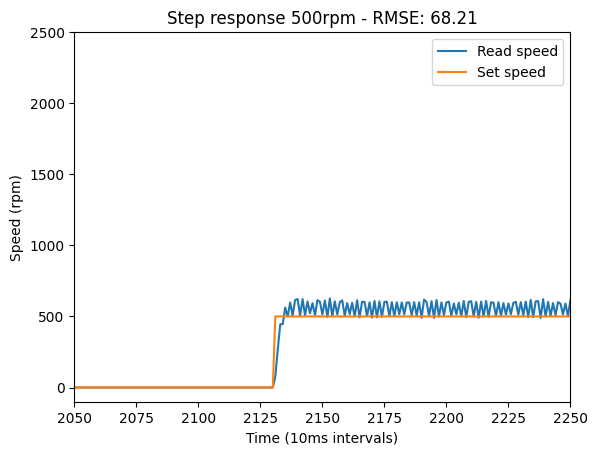

In [25]:
analyse(data_1, 500, (2050, 2250), (-100, 2500))

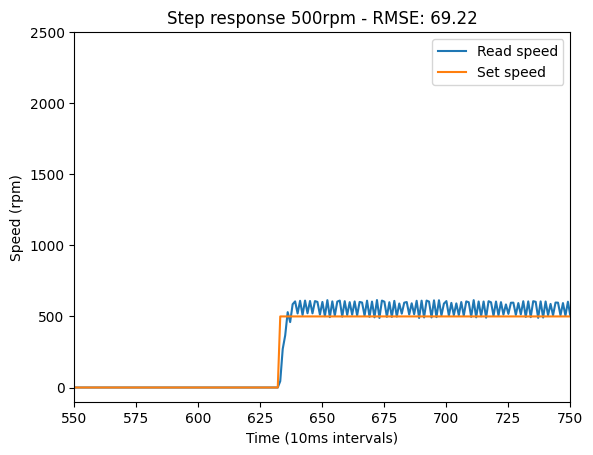

In [26]:
analyse(data_2, 500, xbound=(550,750), ybound=(-100, 2500))
# analyse(data_2, 500, xbound=(625,640), ybound=(-100, 2500))

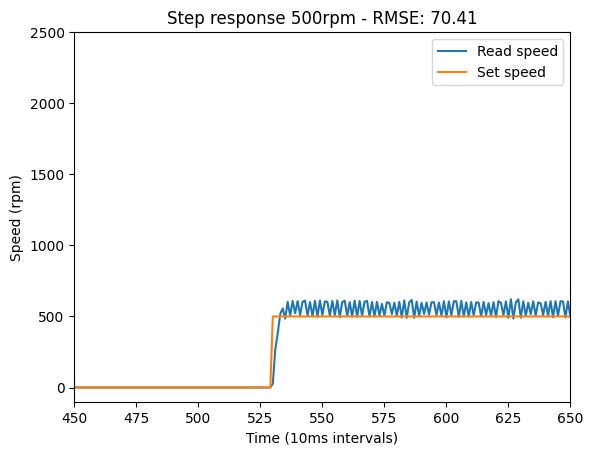

In [27]:
analyse(data_3, 500, xbound= (450,650), ybound=(-100, 2500))

In [28]:
with open('2000rpm_10ms_1.txt', 'r') as f:
    data_4 = f.read().split('\n')
with open('2000rpm_10ms_2.txt', 'r') as f:
    data_5 = f.read().split('\n')
with open('2000rpm_10ms_3.txt', 'r') as f:
    data_6 = f.read().split('\n')

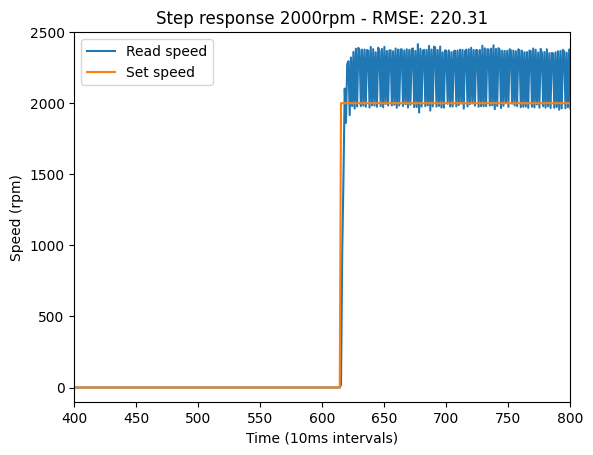

In [29]:
analyse(data_4, 2000, xbound=(400, 800), ybound=(-100, 2500))

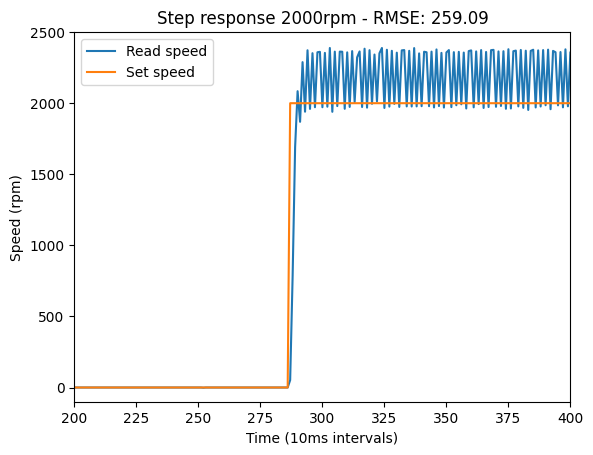

In [30]:
analyse(data_5, 2000, xbound=(200, 400), ybound=(-100, 2500))

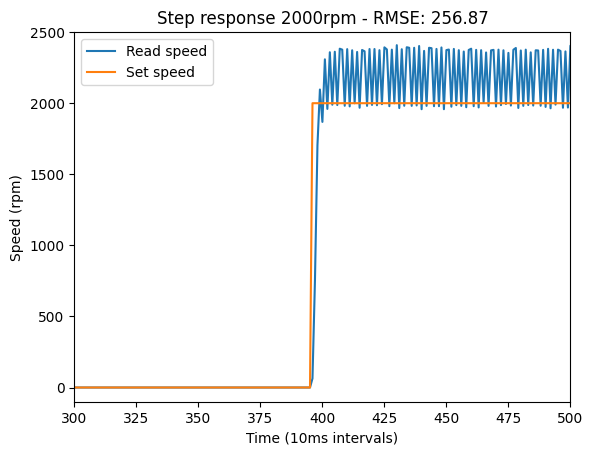

In [31]:
analyse(data_6, 2000, xbound=(300, 500), ybound=(-100, 2500))